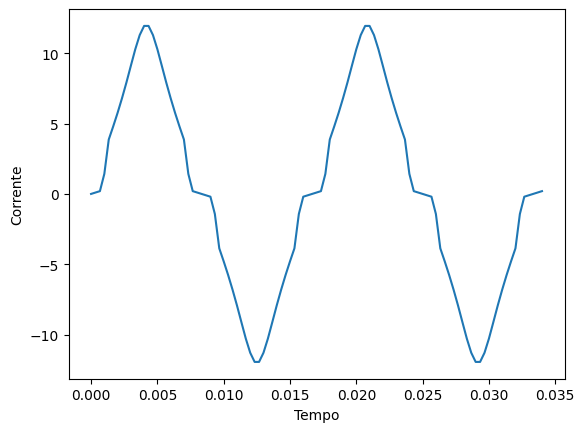

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Tensão máxima [V]:
V = 230 * (2 ** 0.5)
# Frequência [Hz]:
f = 60
# Número de espiras do primário: Função disponível no arquivo calculo_espiras.ipynb
n = numero_espiras(frequencia, potencia_aparente,tensao_primaria, tensao_secundaria)[0]

coordinates = pd.read_excel('/MagCurve.xlsx')
fmm = coordinates['MMF']
fluxo = coordinates['Fluxo']

t = np.arange(0, 0.034, 1/3000)
fluxo_por_tempo = -V * np.cos(2 * np.pi * f * t) / (2 * np.pi * f * n)

interp_function = interp1d(fluxo, fmm, kind='linear', fill_value="extrapolate")
mmf = interp_function(fluxo_por_tempo)

corrente = mmf/n

# Plotando o gráfico
plt.ylabel("Im [A]")
plt.xlabel("t [s]")
plt.plot(t, corrente)
plt.show()

